In [78]:
#Setting up environment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [3]:
#Loading data

df = pd.read_csv('C:/Users/lucyf/Coding/Homelessness reasons/A2P_202212.csv')
df.head(30)

,"Table A2P - Number of households owed a prevention duty by reason for loss, or threat of loss, of last settled home\nEngland, October to December 2022",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,NaN,NaN,NaN,NaN,NaN,NaN,End of private rented tenancy - assured shorthold,NaN,NaN,NaN,...,NaN,NaN,Eviction from supported housing,NaN,NaN,NaN,NaN,Left institution with no accommodation available,Required to leave accommodation provided by Ho...,Other reasons / not known6
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Number of households
2,NaN,NaN,NaN,NaN,Total owed a prevention duty1,NaN,End of assured shorthold (AST) private rented ...,NaN,NaN,NaN,...,NaN,NaN,"Eviction from supported housing, due to..",NaN,NaN,NaN,NaN,Left institution with no accommodation available,Required to leave accommodation provided by Ho...,Other reasons / not known5
3,NaN,NaN,NaN,NaN,NaN,NaN,Total end\n of AST,NaN,Of which:,NaN,...,NaN,NaN,Total evicted from supported housing,Of which:,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Rent arrears, due to..",NaN,...,Other reasons / not known3,NaN,NaN,Rent arrears,"Breach of tenancy or licence, not related to r...",Other reasons / not known4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tenant difficulty budgeting or making other pa...,Increase\n in rent �,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,E92000001,ENGLAND,NaN,NaN,"31,800",NaN,"11,790",NaN,670,170,...,390,NaN,"1,200",110,390,690,NaN,680,670,"1,640"
7,E12000007,London,NaN,NaN,"5,850",NaN,"2,420",NaN,120,50,...,60,NaN,130,10,40,90,NaN,60,90,330
8,-,Rest of England,NaN,NaN,"25,950",NaN,"9,370",NaN,550,120,...,330,NaN,"1,060",100,360,600,NaN,620,580,"1,300"
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.tail(30)

,"Table A2P - Number of households owed a prevention duty by reason for loss, or threat of loss, of last settled home\nEngland, October to December 2022",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
315,E08000010,Wigan,NaN,NaN,276,NaN,98,NaN,3,1,...,4,NaN,6,0,3,3,NaN,1,27,8
316,E06000054,Wiltshire,NaN,NaN,165,NaN,41,NaN,0,0,...,4,NaN,6,0,3,3,NaN,1,1,12
317,E07000094,Winchester,NaN,NaN,60,NaN,17,NaN,2,0,...,1,NaN,1,0,1,0,NaN,3,0,2
318,E06000040,Windsor & Maidenhead,NaN,NaN,31,NaN,10,NaN,0,0,...,0,NaN,0,0,0,0,NaN,0,0,1
319,E08000015,Wirral,NaN,NaN,99,NaN,43,NaN,2,0,...,0,NaN,2,0,0,2,NaN,6,0,3
320,E07000217,Woking,NaN,NaN,41,NaN,21,NaN,0,0,...,1,NaN,0,0,0,0,NaN,1,0,9
321,E06000041,Wokingham,NaN,NaN,41,NaN,15,NaN,0,1,...,0,NaN,1,0,0,1,NaN,0,0,0
322,E08000031,Wolverhampton,NaN,NaN,..,NaN,..,NaN,..,..,...,..,NaN,..,..,..,..,NaN,..,..,..
323,E07000237,Worcester,NaN,NaN,74,NaN,17,NaN,0,1,...,0,NaN,2,0,0,2,NaN,0,0,4
324,E07000229,Worthing,NaN,NaN,32,NaN,21,NaN,1,0,...,0,NaN,5,0,0,5,NaN,0,0,0


In [5]:
#Removing header rows at the top
df.drop(df.index[:6], inplace=True)

#Removing notes rows at the bottom
df.drop(df.index[323:], inplace=True)

#Resetting index
df = df.reset_index(drop=True)

In [6]:
df.tail(20)

,"Table A2P - Number of households owed a prevention duty by reason for loss, or threat of loss, of last settled home\nEngland, October to December 2022",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
303,E07000127,West Lancashire,NaN,NaN,25,NaN,14,NaN,0,0,...,0,NaN,0,0,0,0,NaN,1,0,3
304,E07000142,West Lindsey,NaN,NaN,73,NaN,26,NaN,4,1,...,2,NaN,3,1,1,1,NaN,0,0,3
305,E06000062,West Northamptonshire,NaN,NaN,214,NaN,64,NaN,4,1,...,1,NaN,22,2,4,16,NaN,31,0,5
306,E07000181,West Oxfordshire,NaN,NaN,31,NaN,4,NaN,0,0,...,0,NaN,0,0,0,0,NaN,2,0,4
307,E07000245,West Suffolk,NaN,NaN,60,NaN,27,NaN,1,1,...,1,NaN,1,0,0,1,NaN,0,0,6
308,E09000033,Westminster,NaN,NaN,128,NaN,93,NaN,3,1,...,4,NaN,1,0,0,1,NaN,0,0,12
309,E08000010,Wigan,NaN,NaN,276,NaN,98,NaN,3,1,...,4,NaN,6,0,3,3,NaN,1,27,8
310,E06000054,Wiltshire,NaN,NaN,165,NaN,41,NaN,0,0,...,4,NaN,6,0,3,3,NaN,1,1,12
311,E07000094,Winchester,NaN,NaN,60,NaN,17,NaN,2,0,...,1,NaN,1,0,1,0,NaN,3,0,2
312,E06000040,Windsor & Maidenhead,NaN,NaN,31,NaN,10,NaN,0,0,...,0,NaN,0,0,0,0,NaN,0,0,1


In [7]:
#Checking the total number of rows in the dataset
df.shape[0]

323

In [8]:
#Checking how many null values per column, at this point looking for blank columns where all values are null
df.isnull().sum()

Table A2P - Number of households owed a prevention duty by reason for loss, or threat of loss, of last settled home\nEngland, October to December 2022      2
Unnamed: 1                                                                                                                                                  2
Unnamed: 2                                                                                                                                                323
Unnamed: 3                                                                                                                                                323
Unnamed: 4                                                                                                                                                  2
Unnamed: 5                                                                                                                                                323
Unnamed: 6                                          

In [9]:
#Dropping spacer columns where all values are null

blank_columns = df.columns[df.isnull().sum() == df.shape[0]].tolist()
df.drop(blank_columns, axis=1, inplace=True)

df.head()

,"Table A2P - Number of households owed a prevention duty by reason for loss, or threat of loss, of last settled home\nEngland, October to December 2022",Unnamed: 1,Unnamed: 4,Unnamed: 6,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 14,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,E92000001,ENGLAND,"31,800","11,790",670,170,210,200,640,200,...,"1,000",110,390,"1,200",110,390,690,680,670,"1,640"
1,E12000007,London,"5,850","2,420",120,50,20,110,100,20,...,280,10,60,130,10,40,90,60,90,330
2,-,Rest of England,"25,950","9,370",550,120,190,100,540,170,...,720,100,330,"1,060",100,360,600,620,580,"1,300"
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E12000001,North East,"2,320",580,60,0,10,10,30,10,...,50,0,40,90,10,40,40,50,140,130


In [10]:
#Dropping spacer rows, where Unnamed:1 (local authority) column is null

df.dropna(subset=['Unnamed: 1'], axis=0, inplace=True)
df = df.reset_index(drop=True)

df.head()

,"Table A2P - Number of households owed a prevention duty by reason for loss, or threat of loss, of last settled home\nEngland, October to December 2022",Unnamed: 1,Unnamed: 4,Unnamed: 6,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 14,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,E92000001,ENGLAND,"31,800","11,790",670,170,210,200,640,200,...,"1,000",110,390,"1,200",110,390,690,680,670,"1,640"
1,E12000007,London,"5,850","2,420",120,50,20,110,100,20,...,280,10,60,130,10,40,90,60,90,330
2,-,Rest of England,"25,950","9,370",550,120,190,100,540,170,...,720,100,330,"1,060",100,360,600,620,580,"1,300"
3,E12000001,North East,"2,320",580,60,0,10,10,30,10,...,50,0,40,90,10,40,40,50,140,130
4,E12000002,North West,"4,350","1,570",50,20,20,20,90,30,...,120,20,50,130,10,40,90,110,160,180


In [11]:
#Renaming columns

df.columns=['ONS_code', 'local_authority', 'total_prevention_duty', 'AST_total', 'AST_arrears_budgeting', 'AST_arrears_rent_increase', 'AST_arrears_employment_reduction', 'AST_arrears_benefit_reduction', 'AST_arrears_personal_circs', 'AST_breach', 'AST_LL_sell_relet', 'AST_disrepair_complaint', 'AST_illegal_eviction', 'AST_abandoned', 'AST_other', 'non_AST_private_let', 'family_friends', 'relationship_breakdown', 'domestic_violence', 'other_violence', 'social_total', 'social_arrears', 'social_breach', 'social_other', 'supported_total', 'supported_arrears', 'supported_breach', 'supported_other', 'institution', 'asylum_accommodation', 'other']

In [12]:
#Rows 0-11 are large areas rather than single local authorities, so they will skew my analysis

#Saving these rows to a separate dataframe in case I want to use them later
region_df = df[:12]

#Then dropping them from the main dataframe
df = df[12:]
df = df.reset_index(drop=True)

In [15]:
#Creating function for all the above steps 

def strip_rename(df):
    df.drop(df.index[:6], inplace=True)
    df.drop(df.index[323:], inplace=True)
    blank_columns = df.columns[df.isnull().sum() == df.shape[0]].tolist()
    df.drop(blank_columns, axis=1, inplace=True)
    df.dropna(subset=['Unnamed: 1'], axis=0, inplace=True)
    df.columns=['ONS_code', 'local_authority', 'total_prevention_duty', 'AST_total', 'AST_arrears_budgeting', 'AST_arrears_rent_increase', 'AST_arrears_employment_reduction', 'AST_arrears_benefit_reduction', 'AST_arrears_personal_circs', 'AST_breach', 'AST_LL_sell_relet', 'AST_disrepair_complaint', 'AST_illegal_eviction', 'AST_abandoned', 'AST_other', 'non_AST_private_let', 'family_friends', 'relationship_breakdown', 'domestic_violence', 'other_violence', 'social_total', 'social_arrears', 'social_breach', 'social_other', 'supported_total', 'supported_arrears', 'supported_breach', 'supported_other', 'institution', 'asylum_accommodation', 'other']
    region_df = df[:12]
    df = df[12:]
    df = df.reset_index(drop=True)
    return df, region_df

In [21]:
#Testing my strip_rename function with stats from Apr-Oct 2022

df_22Q1 = pd.read_csv('C:/Users/lucyf/Coding/Homelessness reasons/A2P_202209.csv')

df_22Q1, region_22Q1 = strip_rename(df_22Q1)

df_22Q1.head(20)

,ONS_code,local_authority,total_prevention_duty,AST_total,AST_arrears_budgeting,AST_arrears_rent_increase,AST_arrears_employment_reduction,AST_arrears_benefit_reduction,AST_arrears_personal_circs,AST_breach,...,social_arrears,social_breach,social_other,supported_total,supported_arrears,supported_breach,supported_other,institution,asylum_accommodation,other
0,E07000223,Adur,13,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,E07000026,Allerdale,58,26,2,0,0,0,1,2,...,1,0,3,1,0,0,1,0,0,6
2,E07000032,Amber Valley,83,24,0,0,0,0,0,0,...,0,0,1,2,1,1,0,0,0,1
3,E07000224,Arun,93,59,6,0,1,2,3,3,...,0,1,1,3,0,2,1,0,0,2
4,E07000170,Ashfield,32,22,0,0,0,0,3,0,...,0,0,1,0,0,0,0,0,0,3
5,E07000105,Ashford,80,42,1,0,2,0,3,1,...,0,0,0,1,0,0,1,2,0,1
6,E07000200,Babergh,55,22,1,0,0,0,2,0,...,6,1,4,0,0,0,0,0,0,2
7,E09000002,Barking & Dagenham,205,62,2,0,2,1,4,1,...,1,1,1,4,0,0,4,2,7,16
8,E09000003,Barnet,231,114,4,1,3,3,6,0,...,1,0,0,2,0,0,2,1,0,28
9,E08000016,Barnsley,86,41,3,0,1,0,2,1,...,0,0,1,4,0,4,0,21,2,2


In [22]:
#Returning to original Q2 dataset

#Checking for null values

df.isnull().sum()

ONS_code                            0
local_authority                     0
total_prevention_duty               0
AST_total                           0
AST_arrears_budgeting               0
AST_arrears_rent_increase           0
AST_arrears_employment_reduction    0
AST_arrears_benefit_reduction       0
AST_arrears_personal_circs          0
AST_breach                          0
AST_LL_sell_relet                   0
AST_disrepair_complaint             0
AST_illegal_eviction                0
AST_abandoned                       0
AST_other                           0
non_AST_private_let                 0
family_friends                      0
relationship_breakdown              0
domestic_violence                   0
other_violence                      0
social_total                        0
social_arrears                      0
social_breach                       0
social_other                        0
supported_total                     0
supported_arrears                   0
supported_br

In [24]:
#Checking data types

df.dtypes

#These should all be numerical except ONS code and local_authority

ONS_code                            object
local_authority                     object
total_prevention_duty               object
AST_total                           object
AST_arrears_budgeting               object
AST_arrears_rent_increase           object
AST_arrears_employment_reduction    object
AST_arrears_benefit_reduction       object
AST_arrears_personal_circs          object
AST_breach                          object
AST_LL_sell_relet                   object
AST_disrepair_complaint             object
AST_illegal_eviction                object
AST_abandoned                       object
AST_other                           object
non_AST_private_let                 object
family_friends                      object
relationship_breakdown              object
domestic_violence                   object
other_violence                      object
social_total                        object
social_arrears                      object
social_breach                       object
social_othe

In [58]:
#Tried converting numerical columns to the correct datatype, but got an error as ".." has been used to represent null values

#Replaced ".." string with null value, then converted columns to floats

for column in df.columns[2:]:
    df[column].replace("..", np.nan, inplace=True)
    df[column] = df[column].astype('int64')

#Checking data types are now correct:
df.dtypes

ONS_code                            object
local_authority                     object
total_prevention_duty                int64
AST_total                            int64
AST_arrears_budgeting                int64
AST_arrears_rent_increase            int64
AST_arrears_employment_reduction     int64
AST_arrears_benefit_reduction        int64
AST_arrears_personal_circs           int64
AST_breach                           int64
AST_LL_sell_relet                    int64
AST_disrepair_complaint              int64
AST_illegal_eviction                 int64
AST_abandoned                        int64
AST_other                            int64
non_AST_private_let                  int64
family_friends                       int64
relationship_breakdown               int64
domestic_violence                    int64
other_violence                       int64
social_total                         int64
social_arrears                       int64
social_breach                        int64
social_othe

In [54]:
#Checking again for null values

df.isnull().sum()

ONS_code                            0
local_authority                     0
total_prevention_duty               0
AST_total                           0
AST_arrears_budgeting               0
AST_arrears_rent_increase           0
AST_arrears_employment_reduction    0
AST_arrears_benefit_reduction       0
AST_arrears_personal_circs          0
AST_breach                          0
AST_LL_sell_relet                   0
AST_disrepair_complaint             0
AST_illegal_eviction                0
AST_abandoned                       0
AST_other                           0
non_AST_private_let                 0
family_friends                      0
relationship_breakdown              0
domestic_violence                   0
other_violence                      0
social_total                        0
social_arrears                      0
social_breach                       0
social_other                        0
supported_total                     0
supported_arrears                   0
supported_br

In [55]:
#Filling null values with the mean of the column, rounded to the nearest integer

for column in df:
    if df[column].isnull().sum() >0:
        df[column].fillna(df[column].mean().round(0), inplace=True)

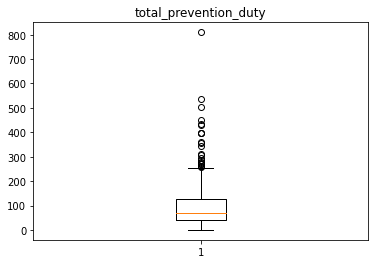

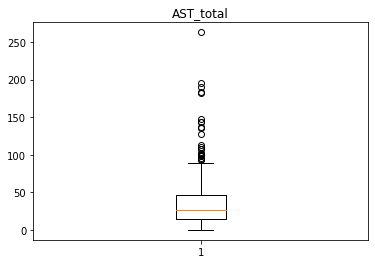

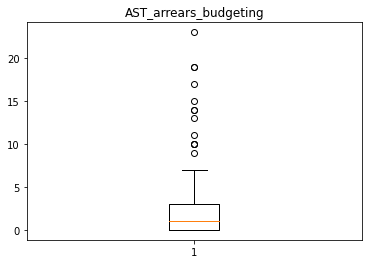

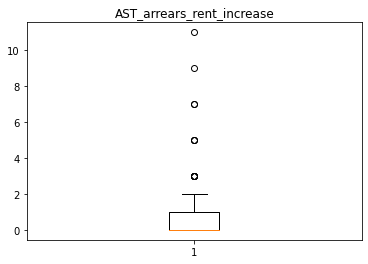

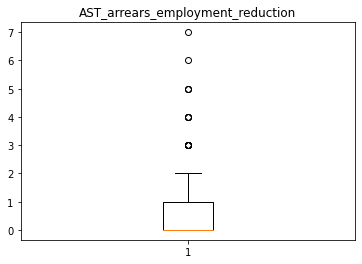

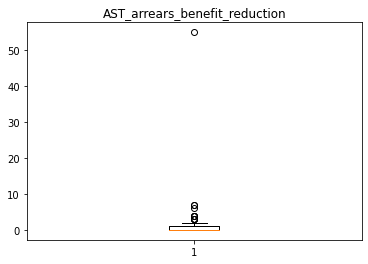

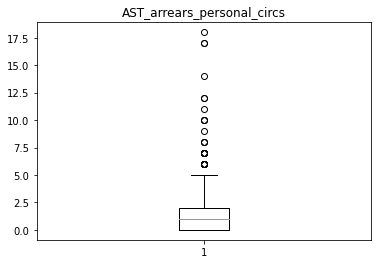

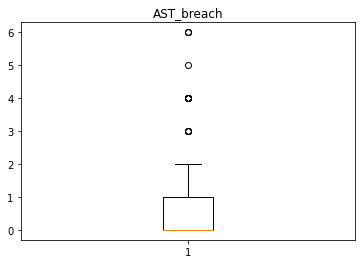

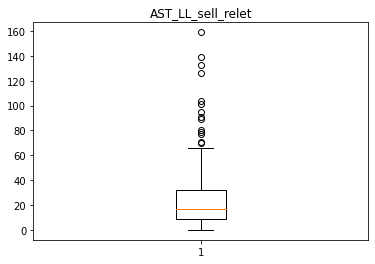

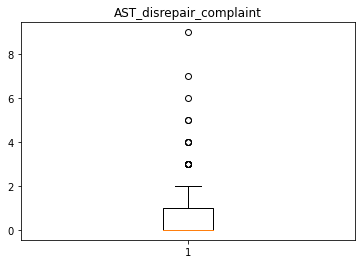

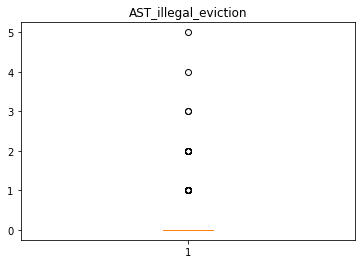

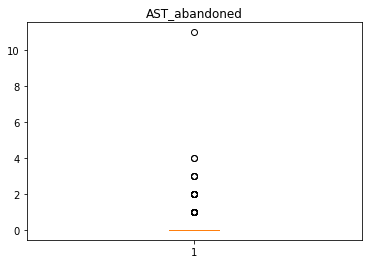

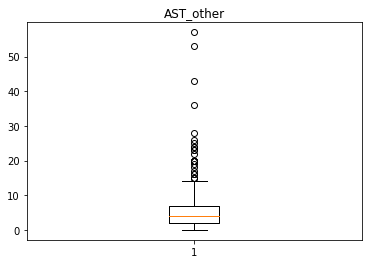

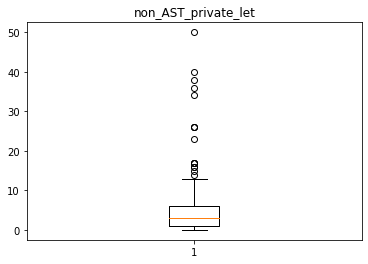

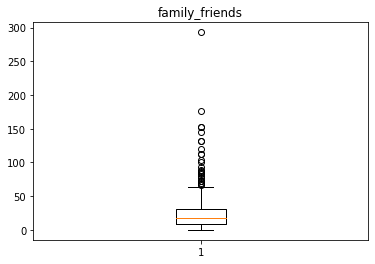

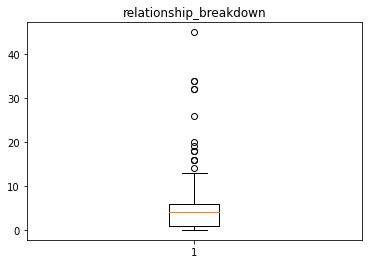

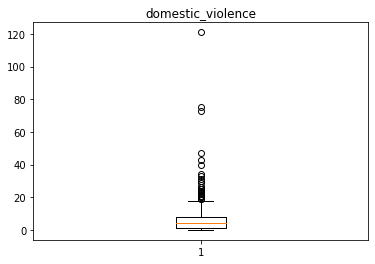

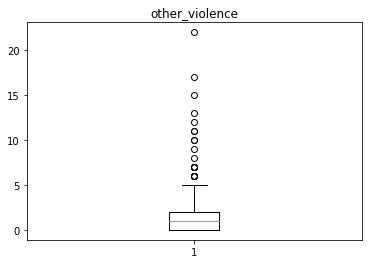

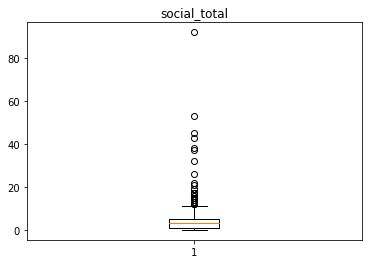

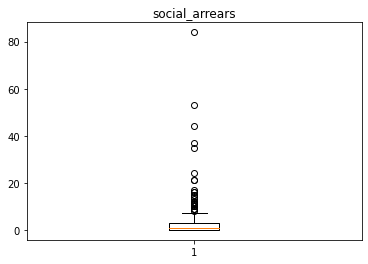

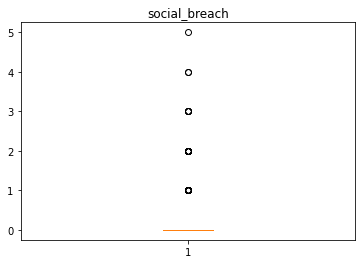

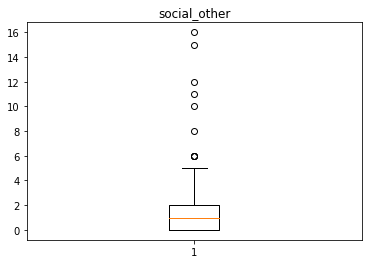

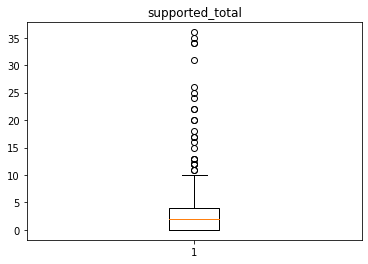

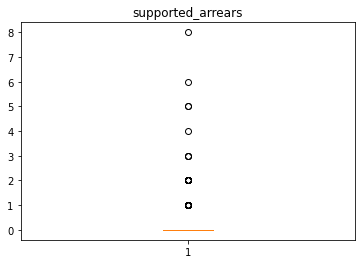

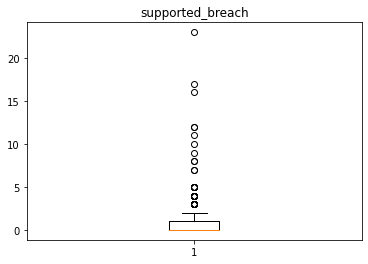

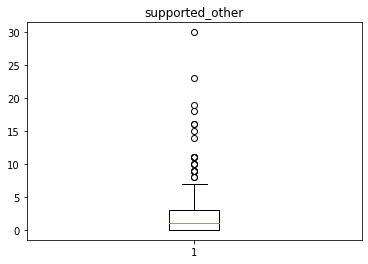

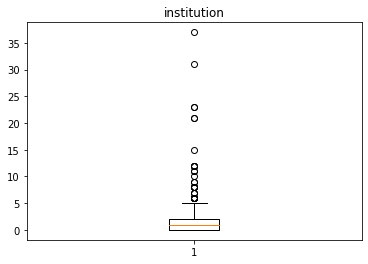

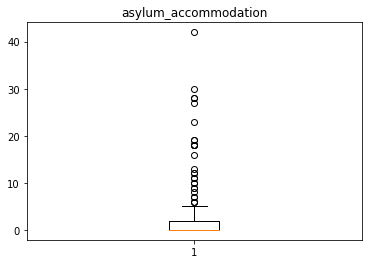

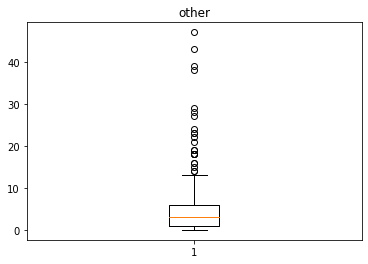

<Figure size 432x288 with 0 Axes>

In [59]:
#Now checking each column for outliers using boxplots

for column in df:
    if df[column].dtype == 'int64':
        plt.boxplot(df[column])
        plt.title(column)
        plt.show()
        plt.clf()

In [79]:
#Checking a few particularly high values by displaying the rows with the 5 highest values in the column

columns_to_check = ['total_prevention_duty', 'AST_total', 'AST_arrears_benefit_reduction', 'AST_abandoned', 'family_friends', 'domestic_violence']

for column in columns_to_check:
    print(column)
    display(df.nlargest(5, column))

total_prevention_duty


,ONS_code,local_authority,total_prevention_duty,AST_total,AST_arrears_budgeting,AST_arrears_rent_increase,AST_arrears_employment_reduction,AST_arrears_benefit_reduction,AST_arrears_personal_circs,AST_breach,AST_LL_sell_relet,AST_disrepair_complaint,AST_illegal_eviction,AST_abandoned,AST_other,non_AST_private_let,family_friends,relationship_breakdown,domestic_violence,other_violence,social_total,social_arrears,social_breach,social_other,supported_total,supported_arrears,supported_breach,supported_other,institution,asylum_accommodation,other
143,E08000035,Leeds,810,190,5,0,5,3,5,3,139,0,3,2,25,7,293,45,121,13,8,1,2,5,35,0,5,30,37,42,19
17,E08000025,Birmingham,538,148,3,2,2,2,14,1,95,4,2,0,23,34,152,16,75,11,11,9,0,2,36,1,16,19,12,4,39
154,E08000003,Manchester,503,263,4,7,3,4,18,4,159,9,1,1,53,15,103,12,43,3,15,7,2,6,5,2,0,3,5,28,11
146,E09000023,Lewisham,449,143,6,2,1,2,7,3,101,1,2,0,18,17,153,14,26,12,17,10,1,6,8,0,5,3,8,4,47
38,E06000060,Buckinghamshire,436,110,5,3,4,1,12,2,62,3,2,1,15,36,112,32,24,15,26,21,2,3,12,5,4,3,8,23,38


AST_total


,ONS_code,local_authority,total_prevention_duty,AST_total,AST_arrears_budgeting,AST_arrears_rent_increase,AST_arrears_employment_reduction,AST_arrears_benefit_reduction,AST_arrears_personal_circs,AST_breach,AST_LL_sell_relet,AST_disrepair_complaint,AST_illegal_eviction,AST_abandoned,AST_other,non_AST_private_let,family_friends,relationship_breakdown,domestic_violence,other_violence,social_total,social_arrears,social_breach,social_other,supported_total,supported_arrears,supported_breach,supported_other,institution,asylum_accommodation,other
154,E08000003,Manchester,503,263,4,7,3,4,18,4,159,9,1,1,53,15,103,12,43,3,15,7,2,6,5,2,0,3,5,28,11
141,E09000022,Lambeth,345,196,19,3,0,55,1,1,104,1,0,0,12,3,54,3,24,1,53,53,0,0,3,0,1,2,0,2,6
143,E08000035,Leeds,810,190,5,0,5,3,5,3,139,0,3,2,25,7,293,45,121,13,8,1,2,5,35,0,5,30,37,42,19
77,E09000009,Ealing,355,184,6,5,1,7,8,0,126,4,3,4,20,26,89,2,15,2,5,5,0,0,4,0,0,4,4,6,18
144,E06000016,Leicester,398,182,10,3,2,0,10,0,133,3,0,1,20,2,132,13,23,5,6,1,0,5,9,0,0,9,2,11,13


AST_arrears_benefit_reduction


,ONS_code,local_authority,total_prevention_duty,AST_total,AST_arrears_budgeting,AST_arrears_rent_increase,AST_arrears_employment_reduction,AST_arrears_benefit_reduction,AST_arrears_personal_circs,AST_breach,AST_LL_sell_relet,AST_disrepair_complaint,AST_illegal_eviction,AST_abandoned,AST_other,non_AST_private_let,family_friends,relationship_breakdown,domestic_violence,other_violence,social_total,social_arrears,social_breach,social_other,supported_total,supported_arrears,supported_breach,supported_other,institution,asylum_accommodation,other
141,E09000022,Lambeth,345,196,19,3,0,55,1,1,104,1,0,0,12,3,54,3,24,1,53,53,0,0,3,0,1,2,0,2,6
77,E09000009,Ealing,355,184,6,5,1,7,8,0,126,4,3,4,20,26,89,2,15,2,5,5,0,0,4,0,0,4,4,6,18
113,E09000014,Haringey,396,136,17,11,2,7,7,5,58,0,0,1,28,40,132,7,11,3,9,6,1,2,13,1,4,8,12,4,29
108,E09000012,Hackney,186,53,3,2,1,6,1,0,20,0,0,0,20,6,62,2,10,9,19,15,3,1,9,4,1,4,2,4,10
8,E09000003,Barnet,243,128,3,1,1,4,3,0,91,0,0,1,24,10,50,2,25,3,1,1,0,0,2,0,0,2,3,0,19


AST_abandoned


,ONS_code,local_authority,total_prevention_duty,AST_total,AST_arrears_budgeting,AST_arrears_rent_increase,AST_arrears_employment_reduction,AST_arrears_benefit_reduction,AST_arrears_personal_circs,AST_breach,AST_LL_sell_relet,AST_disrepair_complaint,AST_illegal_eviction,AST_abandoned,AST_other,non_AST_private_let,family_friends,relationship_breakdown,domestic_violence,other_violence,social_total,social_arrears,social_breach,social_other,supported_total,supported_arrears,supported_breach,supported_other,institution,asylum_accommodation,other
277,E08000036,Wakefield,261,77,19,0,0,0,2,1,40,0,0,11,4,6,40,18,17,6,43,24,4,15,31,2,11,18,12,3,8
70,E06000015,Derby,361,88,10,0,3,1,3,1,46,6,0,4,14,11,113,34,40,3,8,5,0,3,34,1,23,10,9,13,8
77,E09000009,Ealing,355,184,6,5,1,7,8,0,126,4,3,4,20,26,89,2,15,2,5,5,0,0,4,0,0,4,4,6,18
26,E08000032,Bradford,293,89,4,0,0,2,5,2,41,2,4,3,26,3,88,10,24,10,8,2,3,3,24,2,8,14,5,18,14
27,E07000067,Braintree,61,23,4,0,0,0,2,0,12,0,0,3,2,3,13,4,5,2,3,2,0,1,4,0,1,3,0,2,2


family_friends


,ONS_code,local_authority,total_prevention_duty,AST_total,AST_arrears_budgeting,AST_arrears_rent_increase,AST_arrears_employment_reduction,AST_arrears_benefit_reduction,AST_arrears_personal_circs,AST_breach,AST_LL_sell_relet,AST_disrepair_complaint,AST_illegal_eviction,AST_abandoned,AST_other,non_AST_private_let,family_friends,relationship_breakdown,domestic_violence,other_violence,social_total,social_arrears,social_breach,social_other,supported_total,supported_arrears,supported_breach,supported_other,institution,asylum_accommodation,other
143,E08000035,Leeds,810,190,5,0,5,3,5,3,139,0,3,2,25,7,293,45,121,13,8,1,2,5,35,0,5,30,37,42,19
249,E06000004,Stockton-on-Tees,430,78,15,0,1,1,6,0,17,1,0,1,36,3,177,34,33,22,32,16,0,16,13,0,3,10,11,16,11
146,E09000023,Lewisham,449,143,6,2,1,2,7,3,101,1,2,0,18,17,153,14,26,12,17,10,1,6,8,0,5,3,8,4,47
17,E08000025,Birmingham,538,148,3,2,2,2,14,1,95,4,2,0,23,34,152,16,75,11,11,9,0,2,36,1,16,19,12,4,39
168,E08000021,Newcastle on Tyne,399,107,14,0,2,2,2,1,57,1,5,3,20,9,145,32,21,10,14,9,1,4,12,1,9,2,7,30,12


domestic_violence


,ONS_code,local_authority,total_prevention_duty,AST_total,AST_arrears_budgeting,AST_arrears_rent_increase,AST_arrears_employment_reduction,AST_arrears_benefit_reduction,AST_arrears_personal_circs,AST_breach,AST_LL_sell_relet,AST_disrepair_complaint,AST_illegal_eviction,AST_abandoned,AST_other,non_AST_private_let,family_friends,relationship_breakdown,domestic_violence,other_violence,social_total,social_arrears,social_breach,social_other,supported_total,supported_arrears,supported_breach,supported_other,institution,asylum_accommodation,other
143,E08000035,Leeds,810,190,5,0,5,3,5,3,139,0,3,2,25,7,293,45,121,13,8,1,2,5,35,0,5,30,37,42,19
17,E08000025,Birmingham,538,148,3,2,2,2,14,1,95,4,2,0,23,34,152,16,75,11,11,9,0,2,36,1,16,19,12,4,39
100,E08000037,Gateshead,313,53,3,1,2,1,3,1,29,4,0,1,8,0,60,26,73,11,15,2,1,12,17,1,10,6,3,28,27
281,E06000007,Warrington,174,32,0,0,0,0,1,0,26,0,1,0,4,9,48,6,47,0,13,4,5,4,8,0,2,6,5,2,4
154,E08000003,Manchester,503,263,4,7,3,4,18,4,159,9,1,1,53,15,103,12,43,3,15,7,2,6,5,2,0,3,5,28,11


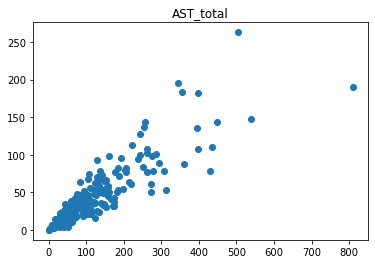

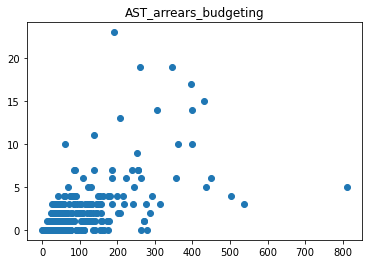

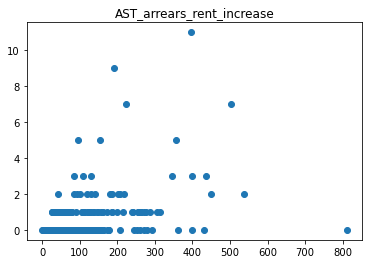

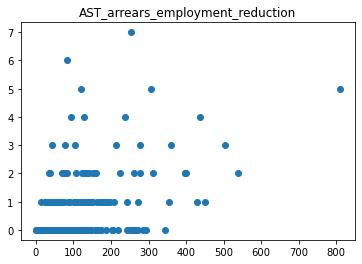

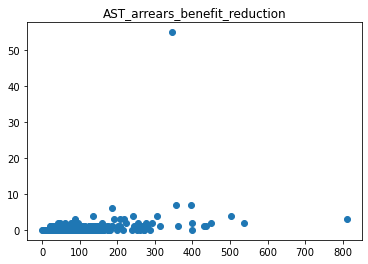

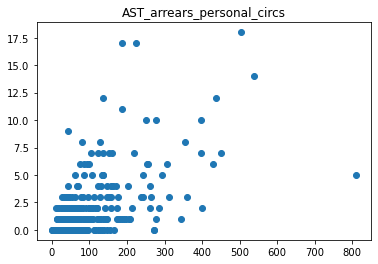

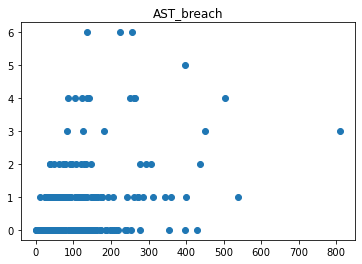

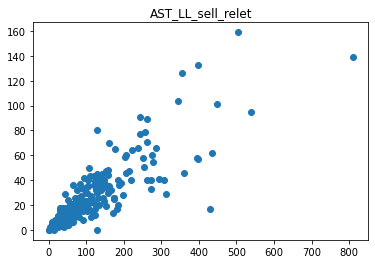

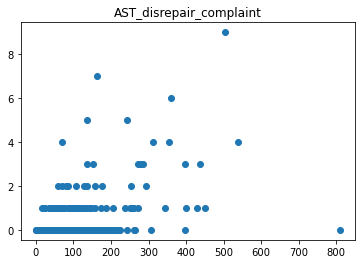

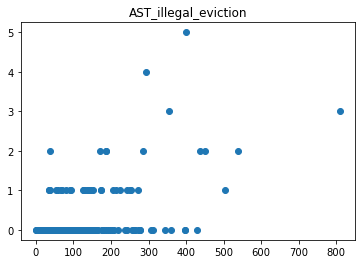

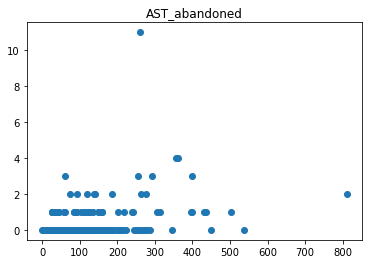

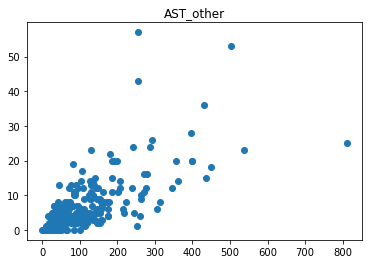

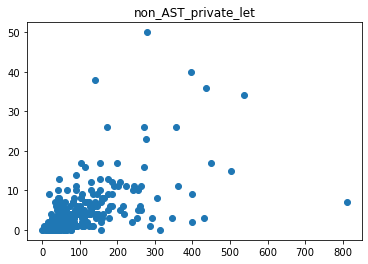

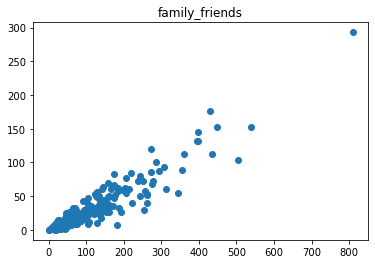

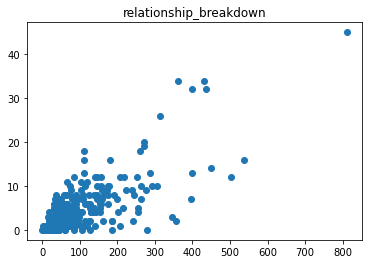

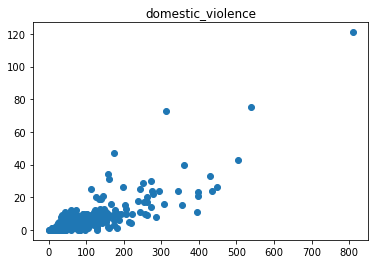

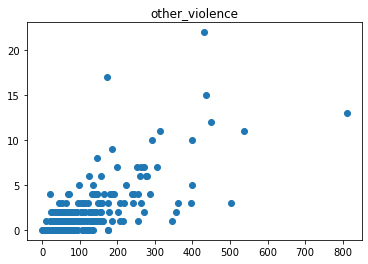

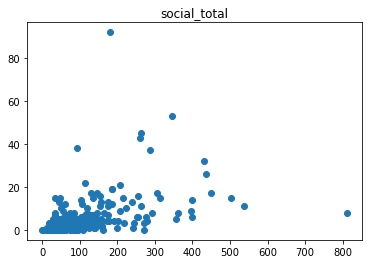

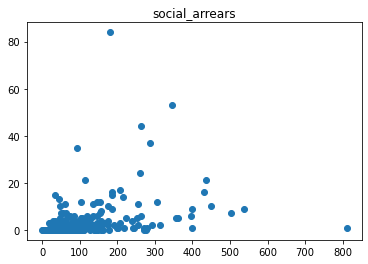

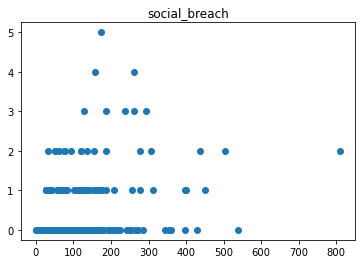

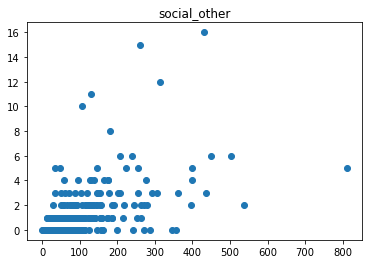

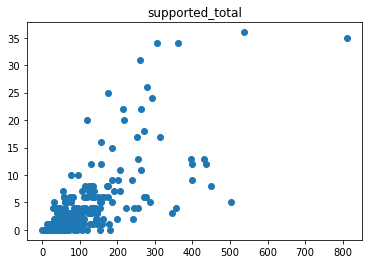

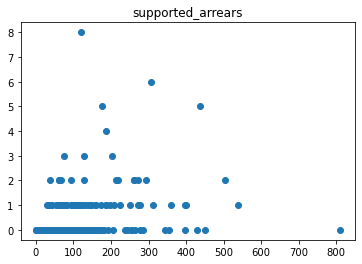

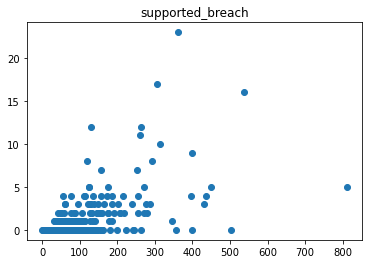

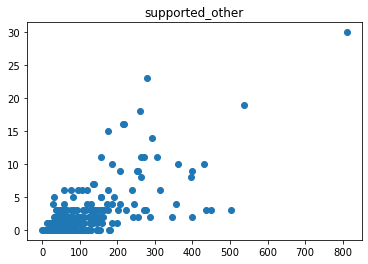

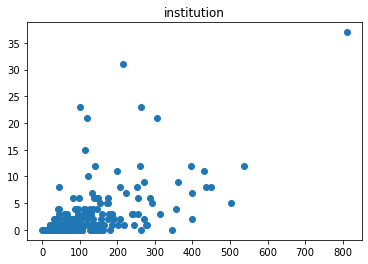

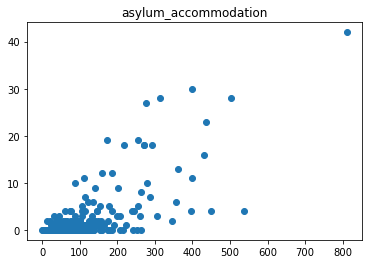

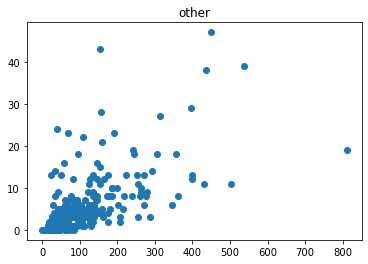

<Figure size 432x288 with 0 Axes>

In [85]:
#Creating scatterplots to check if outlier values are roughly proportionate with total prevention duties

for column in df.columns[3:]:
    plt.scatter(df['total_prevention_duty'], df[column])
    plt.title(column)
    plt.show()
    plt.clf()